In [1]:
#import All required Librarires for the project
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
%matplotlib inline

from time import time
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from keras.utils import to_categorical
import numpy as np
import keras

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense ,BatchNormalization
from keras.models import Sequential


from IPython.display import display


C:\Anaconda2\envs\tensorflowenv\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\envs\tensorflowenv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#read train data 
data = pd.read_csv("fashion-mnist_train.csv")

#Read test data
test_data = pd.read_csv("fashion-mnist_test.csv")

# store the target in new variable and drop the column from features
outcomes = data["label"]
data = data.drop("label",axis=1)

#Store the target in new variable and drop the column from features
test_outcomes = test_data["label"]
test_data = test_data.drop("label",axis=1)

#Display the data shape and datatypes
display(data.head(1))
print(outcomes.shape)
print(type(outcomes))
print(data.shape)
      
#observe the statistical description of each pixel
data.describe()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(60000,)
<class 'pandas.core.series.Series'>
(60000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [3]:
#split the train data into training and validation data
train_data,valid_data,train_outcomes,valid_outcomes = train_test_split(data,outcomes,test_size=0.2,random_state=42)

print(train_data.shape)
print(valid_outcomes.shape)
print(test_data.shape)


(48000, 784)
(12000,)
(10000, 784)


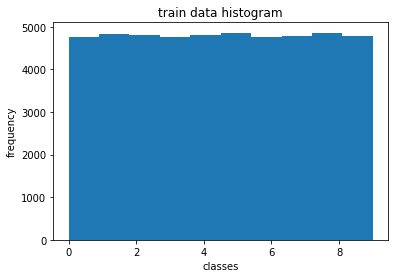

In [4]:
# Histogram for output label in training data
plt.hist(train_outcomes,bins=10)
plt.title("train data histogram")
plt.xlabel("classes")
plt.ylabel("frequency")
plt.show()

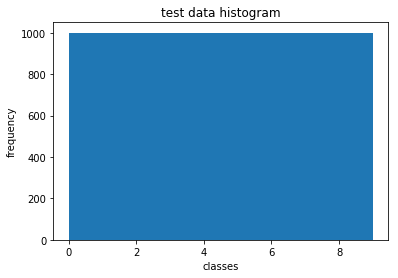

In [5]:
# Histogram for output label in test data
plt.hist(test_outcomes,bins=10)
plt.title("test data histogram")
plt.xlabel("classes")
plt.ylabel("frequency")
plt.show()

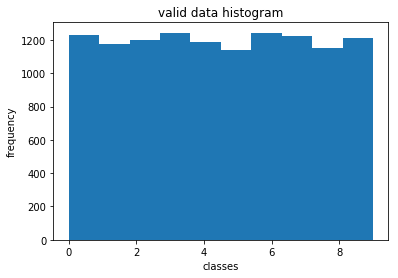

In [6]:
# Histogram for output label in validation data
plt.hist(valid_outcomes,bins=10)
plt.title("valid data histogram")
plt.xlabel("classes")
plt.ylabel("frequency")
plt.show()

In [7]:
#Create a dictionary with class number as key and class name as value
class_names={0:'Tshirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

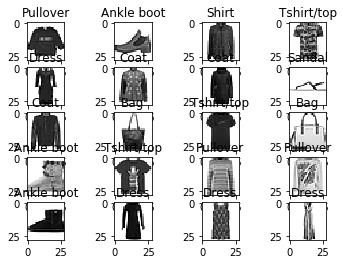

In [8]:
#Display sample images with it's class names as title
for i in range(20):
    x=np.reshape(np.array(data)[i],(28,28))
    #print(type(x))
    plt.subplot(5, 4, i+1)
    plt.title(class_names[outcomes[i]])
    plt.imshow(x,cmap='gray_r')
   
plt.show()


In [9]:
#Craete an instance for the Gaussian Navie Bayes model
clf = GaussianNB()

start = time()
#Fit the model
clf.fit(train_data,train_outcomes)
stop = time()
print("training time for GaussianNB: ",stop-start)
start = time()

start = time()
# ptredict the outcomes for validation data
pred=clf.predict(valid_data)
stop = time()
print("prediction time for GaussianNB valiadtion data: ",stop-start)


# Accuracy score for validation  data
print("prediction data accuracy score for GaussianNB",accuracy_score(pred,valid_outcomes))



training time for GaussianNB:  1.0217185020446777
prediction time for GaussianNB valiadtion data:  1.2201590538024902
prediction data accuracy score for GaussianNB 0.5996666666666667


In [10]:
# ptredict the outcomes for test data
start = time() 
pred = clf.predict(test_data)
stop = time()
print("prediction time for  Gaussinan NB test data: ",stop-start)

print("Accuarcy score for testing data using Gaussian NB :",accuracy_score(pred,test_outcomes))

prediction time for  Gaussinan NB test data:  0.9439175128936768
Accuarcy score for testing data using Gaussian NB : 0.5968


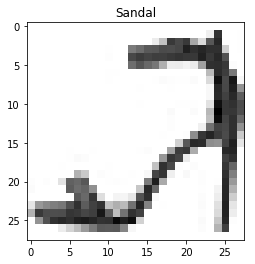

In [11]:
#check with a sample the Gaussin NB Model
x=np.reshape(np.array(test_data)[8],(28,28))
plt.title(class_names[pred[8]])
plt.imshow(x,cmap='gray_r')
   
plt.show()

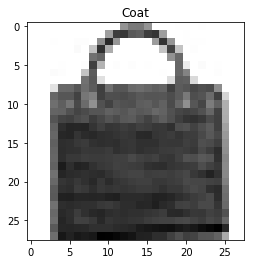

In [12]:
#check with a sample the Gaussin NB Model
x=np.reshape(np.array(test_data)[500],(28,28))
plt.title(class_names[pred[500]])
plt.imshow(x,cmap='gray_r')
   
plt.show()

In [13]:
# create an insatnce for linearSVC
clf = LinearSVC()
start = time()
#fit the data
clf.fit(train_data,train_outcomes)
stop = time()
print("training time for linear SVC: ",stop-start)

training time for linear SVC:  220.5164816379547


In [14]:

start = time()
#predicting outcomes for validation data  
pred=clf.predict(valid_data)
stop = time()
print("prediction time for linear SVC valiadtion data: ",stop-start)


# Accuracy score for tesing data
print("valid data accuracy score for LinearSVC",accuracy_score(pred,valid_outcomes))

prediction time for linear SVC valiadtion data:  0.06183338165283203
valid data accuracy score for LinearSVC 0.7981666666666667


In [15]:
start = time()
#predict outcomes for test_data
pred=clf.predict(test_data)
stop = time()
print("prediction time for linear SVC for test data: ",stop-start)

# Accuracy score for tesing data
print("testing data accuracy score for LinearSVC",accuracy_score(pred,test_outcomes))

prediction time for linear SVC for test data:  0.05080556869506836
testing data accuracy score for LinearSVC 0.8026


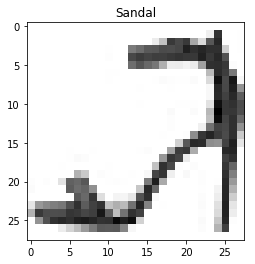

In [16]:
#Check the model with a sample
x=np.reshape(np.array(test_data)[8],(28,28))
plt.title(class_names[pred[8]])
plt.imshow(x,cmap='gray_r')
   
plt.show()

In [17]:
#Change all datatypes as numpy
train_data=np.array(train_data)
test_data=np.array(test_data)
valid_data=np.array(valid_data)

#Change the outcomes data into categorical
test_outcomes = to_categorical(np.array(test_outcomes))
valid_outcomes = to_categorical(np.array(valid_outcomes))
train_outcomes = to_categorical(np.array(train_outcomes))

#Change the features data shape as input to CNN
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)
valid_data = valid_data.reshape(valid_data.shape[0], 28, 28, 1)

#Change the datatype to float
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
valid_data = valid_data.astype('float32')

#Normalize the data by dividing with 255
train_data /= 255
test_data /= 255
valid_data /= 255
#check the shapes of data and outcomes
print(valid_outcomes.shape)
print(valid_data.shape)



(12000, 10)
(12000, 28, 28, 1)


In [18]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense ,BatchNormalization
from keras.models import Sequential



model = Sequential()
#Convoltipon 2D layer with Kernel size 2 and activation function elu
model.add(Conv2D(filters=32,kernel_size=2,activation='elu',padding='same',input_shape =train_data.shape[1:]))

#max pooling with pool_size and strides 2
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Dropout(0.2))
#Convoltipon 2D layer with Kernel size 2 and activation function elu
model.add(Conv2D(filters=64,kernel_size=2,activation='elu',padding='same'))
#max pooling with pool_size and strides 2
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
#Convoltipon 2D layer with Kernel size 2 and activation function elu
model.add(Conv2D(filters=128,kernel_size=2,activation='elu',padding='same'))
#max pooling with pool_size and strides 2
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(GlobalAveragePooling2D())
#Fully connected layer with 10 classifiers
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         32896     
__________

In [19]:
# Complinig the model with loss function categorical_hinge and optimizer Adam
model.compile(loss=keras.losses.categorical_hinge,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
              
#Fit the model with 5 echos and batchsize 20
history = model.fit(train_data, train_outcomes,batch_size=20,
          epochs=5,
          verbose=1,
          validation_data=(valid_data, valid_outcomes))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 77s 2ms/step - loss: 0.5262 - acc: 0.7305 - val_loss: 0.4116 - val_acc: 0.7945
Epoch 2/5
48000/48000 [==============================] - 77s 2ms/step - loss: 0.3860 - acc: 0.8064 - val_loss: 0.3589 - val_acc: 0.8203
Epoch 3/5
48000/48000 [==============================] - 77s 2ms/step - loss: 0.3572 - acc: 0.8215 - val_loss: 0.3585 - val_acc: 0.8188
Epoch 4/5
48000/48000 [==============================] - 78s 2ms/step - loss: 0.3347 - acc: 0.8327 - val_loss: 0.3114 - val_acc: 0.8448
Epoch 5/5
48000/48000 [==============================] - 79s 2ms/step - loss: 0.3199 - acc: 0.8404 - val_loss: 0.3355 - val_acc: 0.8321


In [20]:
#caluculate accuracy score with loss function categorical_hinge and optimizer Adam
score = model.evaluate(test_data, test_outcomes, verbose=0)
print("accuracy score with loss function categorical_hinge and optimizer Adam",score[1])

accuracy score with loss function categorical_hinge and optimizer Adam 0.8347


In [21]:
# Complinig the model with loss function categorical_hinge and optimizer Adadelta
model.compile(loss=keras.losses.categorical_hinge,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(train_data, train_outcomes,batch_size=20,
          epochs=5,
          verbose=1,
          validation_data=(valid_data, valid_outcomes))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 76s 2ms/step - loss: 0.3032 - acc: 0.8484 - val_loss: 0.3192 - val_acc: 0.8394
Epoch 2/5
48000/48000 [==============================] - 79s 2ms/step - loss: 0.2918 - acc: 0.8539 - val_loss: 0.2725 - val_acc: 0.8645
Epoch 3/5
48000/48000 [==============================] - 71s 1ms/step - loss: 0.2844 - acc: 0.8577 - val_loss: 0.2927 - val_acc: 0.8539
Epoch 4/5
48000/48000 [==============================] - 70s 1ms/step - loss: 0.2775 - acc: 0.8618 - val_loss: 0.2588 - val_acc: 0.8710
Epoch 5/5
48000/48000 [==============================] - 71s 1ms/step - loss: 0.2731 - acc: 0.8635 - val_loss: 0.2840 - val_acc: 0.8583


In [22]:
#caluculate accuracy score with loss function categorical_hinge and optimizer Adadelta
score = model.evaluate(test_data, test_outcomes, verbose=0)
print("accuracy score with loss function categorical_hinge and optimizer Adadelta",score[1])


accuracy score with loss function categorical_hinge and optimizer Adadelta 0.857


In [23]:
# Complinig the model with loss function categorical_hinge and optimizer Adagrad
model.compile(loss=keras.losses.categorical_hinge,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])
history = model.fit(train_data, train_outcomes,batch_size=20,
          epochs=5,
          verbose=1,
          validation_data=(valid_data, valid_outcomes))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 74s 2ms/step - loss: 0.2632 - acc: 0.8690 - val_loss: 0.2428 - val_acc: 0.8792
Epoch 2/5
48000/48000 [==============================] - 75s 2ms/step - loss: 0.2446 - acc: 0.8786 - val_loss: 0.2392 - val_acc: 0.8812
Epoch 3/5
48000/48000 [==============================] - 77s 2ms/step - loss: 0.2402 - acc: 0.8810 - val_loss: 0.2403 - val_acc: 0.8800
Epoch 4/5
48000/48000 [==============================] - 77s 2ms/step - loss: 0.2383 - acc: 0.8822 - val_loss: 0.2380 - val_acc: 0.8815
Epoch 5/5
48000/48000 [==============================] - 72s 1ms/step - loss: 0.2342 - acc: 0.8848 - val_loss: 0.2356 - val_acc: 0.8834


In [24]:
#caluculate accuracy score with loss function categorical_hinge and optimizer Adagrad
score = model.evaluate(test_data, test_outcomes, verbose=0)
print("accuracy score with loss function categorical_hinge and optimizer Adagrad",score[1])


accuracy score with loss function categorical_hinge and optimizer Adagrad 0.8886


In [25]:
# Complinig the model with loss function categorical_hinge and optimizer Adamax
model.compile(loss=keras.losses.categorical_hinge,
              optimizer=keras.optimizers.Adamax(),
              metrics=['accuracy'])
history = model.fit(train_data, train_outcomes,batch_size=20,
          epochs=5,
          verbose=1,
          validation_data=(valid_data, valid_outcomes))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2530 - acc: 0.8741 - val_loss: 0.2432 - val_acc: 0.8787
Epoch 2/5
48000/48000 [==============================] - 72s 2ms/step - loss: 0.2465 - acc: 0.8772 - val_loss: 0.2319 - val_acc: 0.8848
Epoch 3/5
48000/48000 [==============================] - 75s 2ms/step - loss: 0.2471 - acc: 0.8775 - val_loss: 0.2331 - val_acc: 0.8833
Epoch 4/5
48000/48000 [==============================] - 78s 2ms/step - loss: 0.2406 - acc: 0.8811 - val_loss: 0.2528 - val_acc: 0.8739
Epoch 5/5
48000/48000 [==============================] - 79s 2ms/step - loss: 0.2410 - acc: 0.8801 - val_loss: 0.2528 - val_acc: 0.8732


In [26]:
#caluculate accuracy score with loss function categorical_hinge and optimizer Adamax
score = model.evaluate(test_data, test_outcomes, verbose=0)
print("accuracy score with loss function categorical_hinge and optimizer Adamax",score[1])


accuracy score with loss function categorical_hinge and optimizer Adamax 0.8836


In [27]:
# Complinig the model with loss function categorical_cross_entropy and optimizer Adagrad
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])
history = model.fit(train_data, train_outcomes,batch_size=20,
          epochs=5,
          verbose=1,
          validation_data=(valid_data, valid_outcomes))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 81s 2ms/step - loss: 0.4722 - acc: 0.8731 - val_loss: 0.3585 - val_acc: 0.8885
Epoch 2/5
48000/48000 [==============================] - 82s 2ms/step - loss: 0.3766 - acc: 0.8796 - val_loss: 0.3462 - val_acc: 0.8862
Epoch 3/5
48000/48000 [==============================] - 79s 2ms/step - loss: 0.3545 - acc: 0.8841 - val_loss: 0.3396 - val_acc: 0.8838
Epoch 4/5
48000/48000 [==============================] - 79s 2ms/step - loss: 0.3418 - acc: 0.8862 - val_loss: 0.3218 - val_acc: 0.8897
Epoch 5/5
48000/48000 [==============================] - 81s 2ms/step - loss: 0.3343 - acc: 0.8887 - val_loss: 0.3199 - val_acc: 0.8908


In [28]:
#caluculate accuracy score with loss function categorical_crossentropy and optimizer Adagrad
score = model.evaluate(test_data, test_outcomes, verbose=0)
print("accuracy score with loss function categorical_cross_entropy and optimizer Adagrad",score[1])


accuracy score with loss function categorical_cross_entropy and optimizer Adagrad 0.897


In [29]:
# Complinig the model with loss function categorical_cross_entropy and optimizer Adagrad
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])
history = model.fit(train_data, train_outcomes,batch_size=20,
          epochs=50,
          verbose=1,
          validation_data=(valid_data, valid_outcomes))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 82s 2ms/step - loss: 0.3477 - acc: 0.8841 - val_loss: 0.3143 - val_acc: 0.8898
Epoch 2/50
48000/48000 [==============================] - 81s 2ms/step - loss: 0.3174 - acc: 0.8909 - val_loss: 0.3162 - val_acc: 0.8880
Epoch 3/50
48000/48000 [==============================] - 82s 2ms/step - loss: 0.3106 - acc: 0.8940 - val_loss: 0.2952 - val_acc: 0.8982
Epoch 4/50
48000/48000 [==============================] - 79s 2ms/step - loss: 0.3070 - acc: 0.8936 - val_loss: 0.2870 - val_acc: 0.9005
Epoch 5/50
48000/48000 [==============================] - 79s 2ms/step - loss: 0.2997 - acc: 0.8964 - val_loss: 0.2885 - val_acc: 0.8995
Epoch 6/50
48000/48000 [==============================] - 82s 2ms/step - loss: 0.2982 - acc: 0.8968 - val_loss: 0.2901 - val_acc: 0.8969
Epoch 7/50
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2955 - acc: 0.8974 - val_loss: 0.2854 - val_acc

In [30]:
#caluculate accuracy score with loss function categorical_cross_entropy and optimizer Adagrad
score = model.evaluate(test_data, test_outcomes, verbose=0)
print("accuracy score with loss function categorical_cross_entropy and optimizer Adagrad",score[1])


accuracy score with loss function categorical_hinge and optimizer Adamax 0.9116


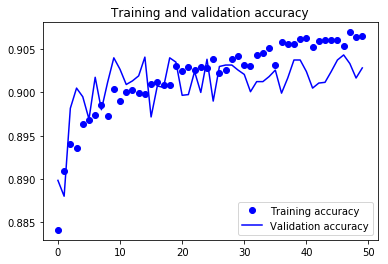

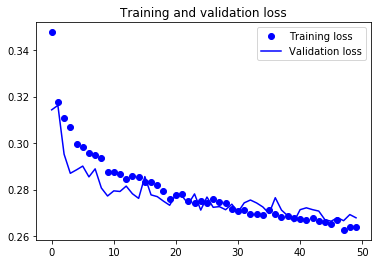

In [31]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Training and validation accuarcy score is  increasing as number of epochs increased but the increment is more upto 40 epochs.After 30 epochs score is almost same.Incase of loss it is decreasing upto 40 epohcs after that it is almost same.

In [36]:
#Convert the  image to give it input to our CNN
import cv2

def img_pixel(path):
    '''Take input image filepath.Return tensor with 28,28,1 shape'''
    img = cv2.imread(path,0)
    img = cv2.resize(img,(28,28))
    img = np.asarray(img)
    img = img.reshape(28, 28,1)
    img= img.astype('float32')
    img /=255
    return img

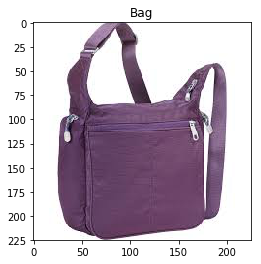

In [76]:
#Tesing with new sample data
path="images\\bag.jpg"
img=cv2.imread(path)
predicted_vector = model.predict(np.expand_dims(img_pixel(path), axis=0))
plt.imshow(img)
plt.title(class_names[np.argmax(predicted_vector)])
plt.show()


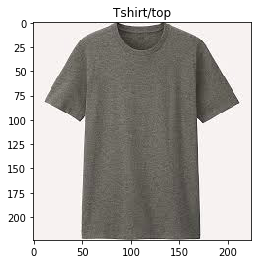

In [79]:
#Testing with new sample data
path="images\\tshirt1.jpg"
img=cv2.imread(path)
predicted_vector = model.predict(np.expand_dims(img_pixel(path), axis=0))
plt.imshow(img)
plt.title(class_names[np.argmax(predicted_vector)])
plt.show()

<h1>Conclusion:</h1>
By Working with different models with the given data finally I can conclude that for CNN we got maximum accuracy of 91.16%.We even tested with outside images.This accuracy is 10% greater than the accuracy of benchmark model i.e linearSVC model.